In [45]:
user_data = sc.textFile('../data/ML_spark/MovieLens/u.user')
user_data.first()

u'1|24|M|technician|85711'

In [46]:
user_fields = user_data.map(lambda line: line.split('|'))
num_users = user_fields.map(lambda fields: fields[0]).count()
num_genders = user_fields.map(lambda fields : fields[2]).distinct().count()
num_occupations = user_fields.map(lambda fields: fields[3]).distinct().count()
num_zipcodes = user_fields.map(lambda fields: fields[4]).distinct().count()
print "Users: %d, genders: %d, occupations: %d, ZIP codes: %d"%(num_users,num_genders,num_occupations,num_zipcodes)

Users: 943, genders: 2, occupations: 21, ZIP codes: 795


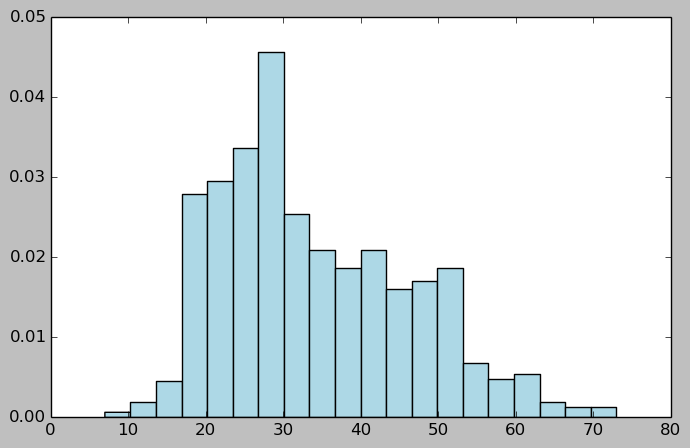

In [47]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
ages = user_fields.map(lambda x: int(x[1])).collect()
hist(ages, bins=20, color='lightblue',normed=True)
fig = plt.gcf()
fig.set_size_inches(8,5)

[(u'administrator', 79), (u'writer', 45), (u'retired', 14), (u'student', 196), (u'doctor', 7), (u'entertainment', 18), (u'marketing', 26), (u'executive', 32), (u'none', 9), (u'scientist', 31), (u'educator', 95), (u'lawyer', 12), (u'healthcare', 16), (u'technician', 27), (u'librarian', 51), (u'programmer', 66), (u'artist', 28), (u'salesman', 12), (u'other', 105), (u'homemaker', 7), (u'engineer', 67)]


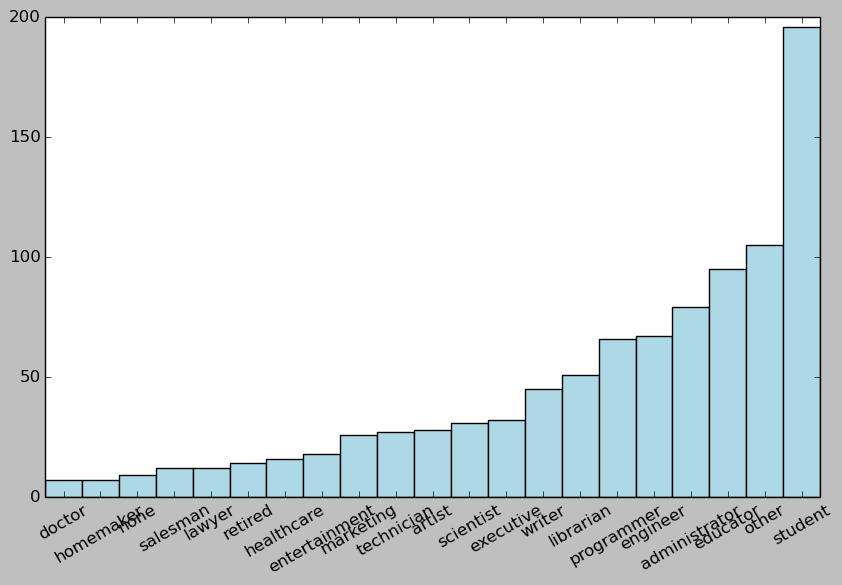

In [28]:
import numpy as np
count_by_occupation = user_fields.map(lambda fields: (fields[3],1)).reduceByKey(lambda x,y:x+y).collect()
print count_by_occupation
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])
x_axis = x_axis1[np.argsort(y_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]
pos = np.arange(len(x_axis))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos+(width)/2)
ax.set_xticklabels(x_axis)

plt.bar(pos, y_axis, width, color='lightblue')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(10,6)

In [29]:
movie_data = sc.textFile("../data/ML_spark/MovieLens/u.item")
print movie_data.first()
num_movies = movie_data.count()
print 'Movies: %d' % num_movies

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
Movies: 1682


1681


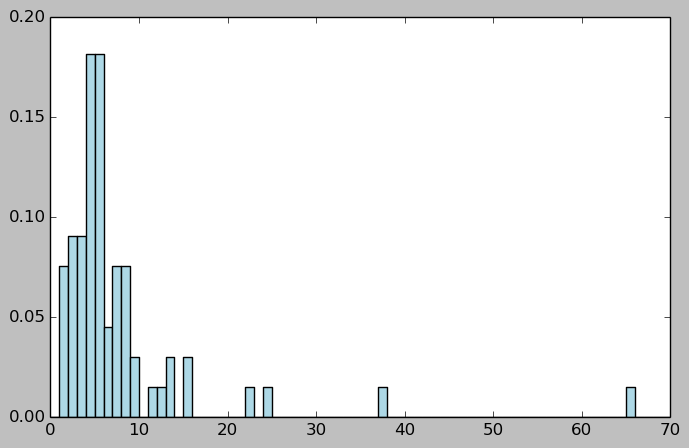

In [30]:
def convert_year(x):
    try:
        return int(x[-4:])
    except:
        return 1900

movie_fields = movie_data.map(lambda lines:lines.split('|'))
years = movie_fields.map(lambda fields: fields[2]).map(lambda x: convert_year(x))
years_filtered = years.filter(lambda x: x!=1900)
print years_filtered.count()
movie_ages = years_filtered.map(lambda yr:1998-yr).countByValue()
values = movie_ages.values()
bins = movie_ages.keys()
hist(values, bins=bins, color='lightblue',normed=True)
fig = plt.gcf()
fig.set_size_inches(8,5)

In [31]:
rating_data = sc.textFile('../data/ML_spark/MovieLens/u.data')
print rating_data.first()
num_ratings = rating_data.count()
print 'Ratings: %d'% num_ratings

196	242	3	881250949
Ratings: 100000


In [32]:
rating_data = rating_data.map(lambda line: line.split('\t'))
ratings = rating_data.map(lambda fields: int(fields[2]))
max_rating = ratings.reduce(lambda x,y:max(x,y))
min_rating = ratings.reduce(lambda x,y:min(x,y))
mean_rating = ratings.reduce(lambda x,y:x+y)/num_ratings
median_rating = np.median(ratings.collect())
ratings_per_user = num_ratings/num_users;
ratings_per_movie = num_ratings/ num_movies
print 'Min rating: %d' %min_rating
print 'max rating: %d' % max_rating
print 'Average rating: %2.2f' %mean_rating
print 'Median rating: %d '%median_rating
print 'Average # of ratings per user: %2.2f'%ratings_per_user
print 'Average # of ratings per movie: %2.2f' % ratings_per_movie

Min rating: 1
max rating: 5
Average rating: 3.00
Median rating: 4 
Average # of ratings per user: 106.00
Average # of ratings per movie: 59.00


In [33]:
 ratings.stats()

(count: 100000, mean: 3.52986, stdev: 1.12566797076, max: 5.0, min: 1.0)

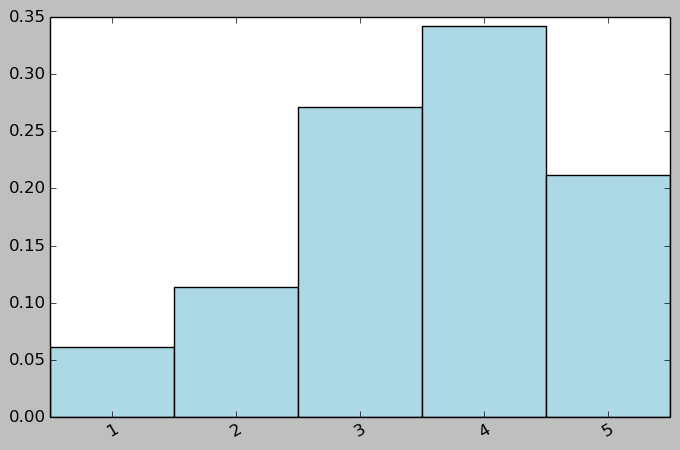

In [34]:
count_by_rating = ratings.countByValue()
x_axis = np.array(count_by_rating.keys())
y_axis = np.array([float(c) for c in count_by_rating.values()])
y_axis_normed = y_axis/y_axis.sum()
pos = np.arange(len(x_axis))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos+(width/2))
ax.set_xticklabels(x_axis)

plt.bar(pos, y_axis_normed, width, color='lightblue')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(8,5)

In [35]:
user_ratings_grouped = rating_data.map(lambda fields:(int(fields[0]),int(fields[2]))).groupByKey()
user_rating_byuser = user_ratings_grouped.map(lambda (k,v):(k,len(v)))
user_rating_byuser.take(5)

[(1, 272), (2, 62), (3, 54), (4, 24), (5, 175)]

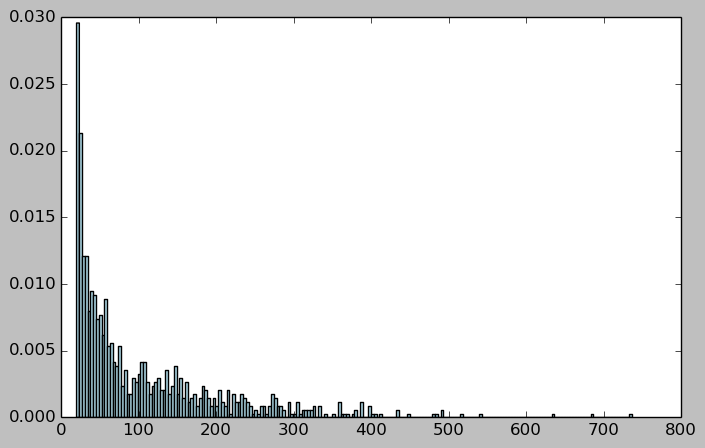

In [36]:
user_ratings_byuser_local = user_rating_byuser.map(lambda (k,v):v).collect()
hist(user_ratings_byuser_local, bins=200, color = 'lightblue',normed = True)
fig = plt.gcf()
fig.set_size_inches(8,5)

In [37]:
# 为每部电影计算他的被评论的次数的分布
movie_ratings_group = rating_data.map(lambda fields: (int(fields[1]),int(fields[2]))).groupByKey()
movie_ratings_byuser = movie_ratings_group.map(lambda (k,v):(k,len(v)))
movie_ratings_byuser.take(5)

[(1, 452), (2, 131), (3, 90), (4, 209), (5, 86)]

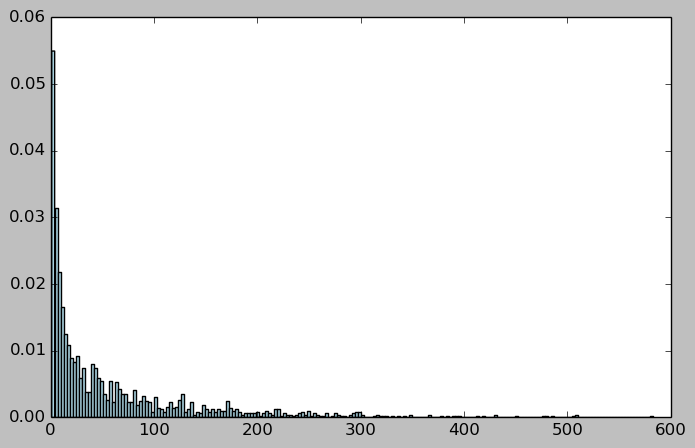

In [38]:
movie_ratings_byuser_local = movie_ratings_byuser.map(lambda (k,v):v).collect()
hist(movie_ratings_byuser_local,bins=200,color='lightblue',normed=True)
fig = plt.gcf()
fig.set_size_inches(8,5)

In [39]:
years_pre_processed = movie_fields.map(lambda fields: fields[2]).map(lambda x: convert_year(x)).collect()
years_pre_processed_array = np.array(years_pre_processed)
mean_year = np.mean(years_pre_processed_array[years_pre_processed_array!=1900])
median_year = np.median(years_pre_processed_array[years_pre_processed_array!=1900])
index_bad_data = np.where(years_pre_processed_array==1900)
years_pre_processed_array[index_bad_data] = median_year
print 'Mean year of release: %d' % mean_year
print 'Median year of release: %d ' % median_year
print "Index of '1900' after assigning median: %s"% np.where(years_pre_processed_array==1900)[0]

Mean year of release: 1989
Median year of release: 1995 
Index of '1900' after assigning median: []


In [41]:
all_occupations = user_fields.map(lambda fields:fields[3]).distinct().collect()
all_occupations.sort()
idx = 0
all_occupations_dict = {}
for o in all_occupations:
    all_occupations_dict[o] = idx
    idx +=1
print "Encoding of 'doctor': %d" %all_occupations_dict['doctor']
print "Encoding of 'programmer': %d" % all_occupations_dict['programmer']

Encoding of 'doctor': 2
Encoding of 'programmer': 14


In [43]:
K=len(all_occupations_dict)
binary_x = np.zeros(K)
k_programmer = all_occupations_dict['programmer']
binary_x[k_programmer] = 1
print 'Binary feature vector: %s'%binary_x
print 'Length of binray vector: %d' %K

Binary feature vector: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.]
Length of binray vector: 21


In [44]:
def extract_datetime(ts):
    import datetime
    return datetime.datetime.fromtimestamp(ts)
timestamps = rating_data.map(lambda fields:int(fields[3]))
hour_of_day = timestamps.map(lambda ts: extract_datetime(ts).hour)
hour_of_day.take(5)

[15, 19, 7, 5, 5]

In [53]:
def assign_tod(hr):
    times_of_day = {
        'morning':range(7,12),
        'lunch': range(12,14),
        'afternoon':range(14,18),
        'evening':range(18,23),
        'night': [23,24,1,2,3,4,5,6]
        }
    for k,v in times_of_day.iteritems():
        if hr in v:
            return k

In [54]:
print hour_of_day.take(5)
time_of_day = hour_of_day.map(lambda hr:assign_tod(hr))
time_of_day.take(5)

[15, 19, 7, 5, 5]


['afternoon', 'evening', 'morning', 'night', 'night']

In [57]:
time_of_day_unique = time_of_day.map(lambda fields:fields).distinct().collect()
time_of_day_unique.sort()
idx = 0
time_of_day_unique_dict = {}
for o in time_of_day_unique:
    time_of_day_unique_dict[o] = idx
    idx +=1
print "Encoding of 'afternoon': %d" %time_of_day_unique_dict['afternoon']
print "Encoding of 'morning': %d" % time_of_day_unique_dict['morning']
print "Encoding of 'lunch': %d" % time_of_day_unique_dict['lunch']

Encoding of 'afternoon': 1
Encoding of 'morning': 4
Encoding of 'lunch': 3


In [60]:
def extract_title(raw):
    import re
    grps = re.search("\((\w+)\)",raw)
    if grps:
        return raw[:grps.start()].strip()
    else:
        return raw
raw_titles = movie_fields.map(lambda fields: fields[1])
for raw_title in raw_titles.take(5):
    print extract_title(raw_title)

Toy Story
GoldenEye
Four Rooms
Get Shorty
Copycat


In [61]:
movie_titles = raw_titles.map(lambda m: extract_title(m))
title_terms = movie_titles.map(lambda m:m.split(' '))
print title_terms.take(5)

[[u'Toy', u'Story'], [u'GoldenEye'], [u'Four', u'Rooms'], [u'Get', u'Shorty'], [u'Copycat']]


In [65]:
all_terms = title_terms.flatMap(lambda x: x).distinct().collect()
idx = 0
all_terms_dict = {}
for term in all_terms:
    all_terms_dict[term] = idx
    idx+=1
    
print "Total number of terms: %d" % len(all_terms_dict)
print "Index of term 'Dead': %d" % all_terms_dict['Dead']
print "Index of term 'Rooms': %d" % all_terms_dict['Rooms']

Total number of terms: 2645
Index of term 'Dead': 723
Index of term 'Rooms': 321


In [66]:
all_terms_dict2 = title_terms.flatMap(lambda x:x).distinct().zipWithIndex().collectAsMap()
print "Index of term 'Dead %d" % all_terms_dict['Dead']
print "Index of term 'Rooms': %d" % all_terms_dict['Rooms']

Index of term 'Dead': 723
Index of term 'Rooms': 321


In [68]:
def create_vector(terms, term_dict):
    from scipy import sparse as sp
    num_terms = len(term_dict)
    x = sp.csc_matrix((1,num_terms))
    for t in terms:
        if t in term_dict:
            idx = term_dict[t]
            x[0,idx] = 1
    return x
all_terms_bcast = sc.broadcast(all_terms_dict)
term_vectors = title_terms.map(lambda terms: create_vector(terms,all_terms_bcast.value))
term_vectors.take(5)

[<1x2645 sparse matrix of type '<type 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Column format>,
 <1x2645 sparse matrix of type '<type 'numpy.float64'>'
 	with 1 stored elements in Compressed Sparse Column format>,
 <1x2645 sparse matrix of type '<type 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Column format>,
 <1x2645 sparse matrix of type '<type 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Column format>,
 <1x2645 sparse matrix of type '<type 'numpy.float64'>'
 	with 1 stored elements in Compressed Sparse Column format>]

In [71]:
np.random.seed(42)
X=np.random.randn(10)
norm_x_2 = np.linalg.norm(X)
normalized_x = X/norm_x_2
print 'x:\n%s' % X
print "2-Norm of x: %2.4f" % norm_x_2
print "Normalized x:\n%s" % normalized_x
print "2-Norm of normalized_x: %2.4f" %np.linalg.norm(normalized_x)

x:
[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]
2-Norm of x: 2.5908
Normalized x:
[ 0.19172213 -0.05336737  0.24999534  0.58786029 -0.09037871 -0.09037237
  0.60954584  0.29621508 -0.1812081   0.20941776]
2-Norm of normalized_x: 1.0000


In [75]:
from pyspark.mllib.feature import Normalizer
normlizer = Normalizer()
vector = sc.parallelize([X])
normalized_x_mllib = normlizer.transform(vector).first().toArray()

In [77]:
print "x:\n%s" % X
print "2-Norm of x: %2.4f" % norm_x_2
print "Normalized x:\n%s" % normalized_x
print "Normalized x MLlib:\n%s" % normalized_x_mllib
print "2-Norm of normalized_x_mllib: %2.4f" % np.linalg.norm(normalized_x_mllib)

x:
[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]
2-Norm of x: 2.5908
Normalized x:
[ 0.19172213 -0.05336737  0.24999534  0.58786029 -0.09037871 -0.09037237
  0.60954584  0.29621508 -0.1812081   0.20941776]
Normalized x MLlib:
[ 0.19172213 -0.05336737  0.24999534  0.58786029 -0.09037871 -0.09037237
  0.60954584  0.29621508 -0.1812081   0.20941776]
2-Norm of normalized_x_mllib: 1.0000
